In [18]:
from lithops import Storage,storage
from lithops.multiprocessing import Pool
from itertools import product
import lithops
import json
import io
from ast import literal_eval
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lithops import FunctionExecutor as fex

In [19]:
stg = Storage()
data = stg.get_object('analysis.data', 'processeddata/sentimentsData.csv').decode()
data = io.StringIO(data)
fulldf = pd.read_csv(data, sep=",")

<AxesSubplot:xlabel='Date', ylabel='Sentiment'>

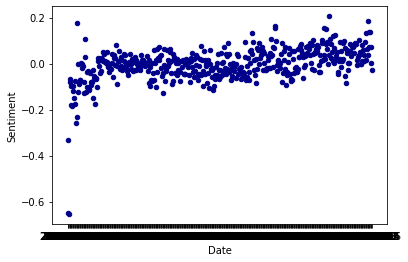

In [20]:
# Day sentiments from 40 days
daySent = pd.concat([fulldf['Date'], fulldf['Sentiment']], axis=1, keys=['Date', 'Sentiment']).groupby(fulldf["Date"]).mean().reset_index()
daySent.plot.scatter(x='Date', y='Sentiment', c='DarkBlue')

<AxesSubplot:xlabel='Date'>

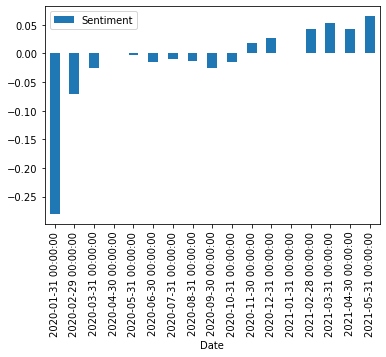

In [21]:
# Sentiments per month
monthSent = daySent.set_index(pd.to_datetime(daySent['Date'])).resample('1M').mean().reset_index()
monthSent.plot(kind='bar',x='Date',y='Sentiment')

<AxesSubplot:ylabel='Count'>

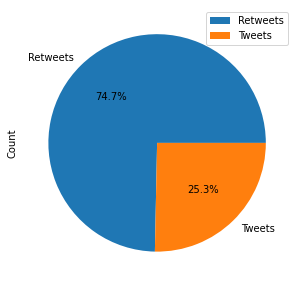

In [22]:
# Check for tweets and retweets count
retweetCount = fulldf[(fulldf['Retweet'] == True)].count()["Id"]
noRetweetCount = fulldf[(fulldf['Retweet'] == False)].count()["Id"]
retweetGraph = pd.DataFrame({'Count': [retweetCount, noRetweetCount]}, index=['Retweets', 'Tweets'])
retweetGraph.plot.pie(y='Count', figsize=(5, 5), autopct='%1.1f%%')

<AxesSubplot:ylabel='Count'>

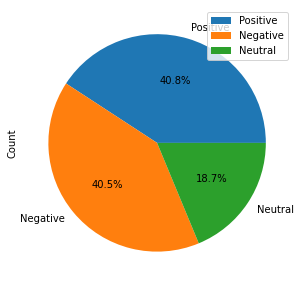

In [23]:
# Total of retweets sentiments
posRetweets = fulldf[(fulldf['Retweet'] == True) & (fulldf['Sentiment'] > 0)].count()["Id"]
negRetweets = fulldf[(fulldf['Retweet'] == True) & (fulldf['Sentiment'] < 0)].count()["Id"]
neuRetweets = fulldf[(fulldf['Retweet'] == True) & (fulldf['Sentiment'] == 0)].count()["Id"]
retweetGraph = pd.DataFrame({'Count': [posRetweets, negRetweets, neuRetweets]}, index=['Positive', 'Negative', 'Neutral'])
retweetGraph.plot.pie(y='Count', figsize=(5, 5), autopct='%1.1f%%')

<AxesSubplot:xlabel='Date'>

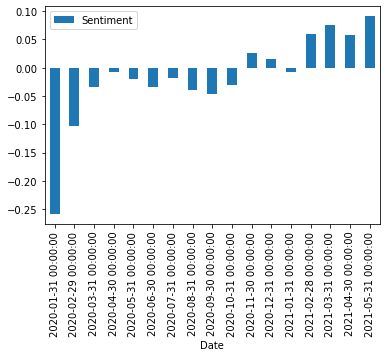

In [24]:
# Retweet sentiments per month
retweetDf = fulldf[(fulldf['Retweet'] == True) & fulldf['Sentiment'] != 0.0]
monthSent = pd.concat([retweetDf['Date'], retweetDf['Sentiment']], axis=1, keys=['Date', 'Sentiment']).groupby(fulldf["Date"]).mean().reset_index()
monthSent.set_index('Date', inplace=True)
monthSent.index = pd.to_datetime(monthSent.index)
monthSent = monthSent.resample('1M').mean().reset_index()
monthSent.plot(kind='bar',x='Date',y='Sentiment')

<AxesSubplot:xlabel='Date'>

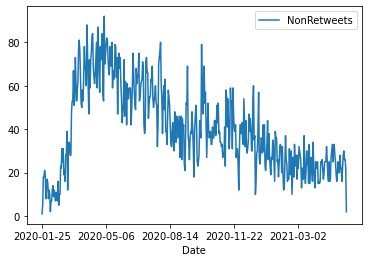

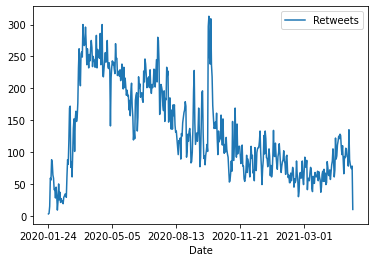

In [25]:
# tweets per day
tweets = fulldf[(fulldf['Retweet'] == False) & fulldf['Sentiment'] != 0.0]
tweets = pd.concat([tweets['Retweet']], axis=1, keys=['NonRetweets']).groupby(tweets["Date"]).count()

# retweets per day
retweets = fulldf[(fulldf['Retweet'] == True) & fulldf['Sentiment'] != 0.0]
retweets = pd.concat([retweets['Retweet']], axis=1, keys=['Retweets']).groupby(retweets["Date"]).count()

tweets.plot()
retweets.plot()

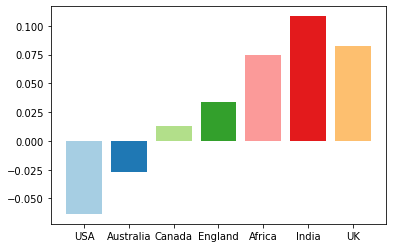

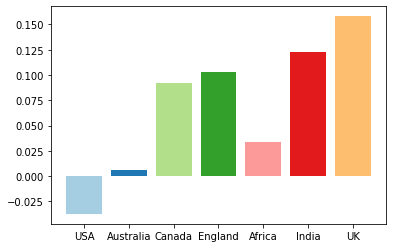

In [26]:
# Sentimients in certain locations
locationSentiments = pd.concat([fulldf['Sentiment'],fulldf['location']], axis=1, keys=['Sentiment', 'Location'])
locationSentiments = locationSentiments.dropna()
locationSentiments = locationSentiments[locationSentiments['Sentiment'] != 0.0]
locations = ["USA", "Australia", "Canada", "England", "Africa", "India", "UK"]
values = []
for l in locations:
    values.append(locationSentiments[(locationSentiments['Location'].str.contains(l))].mean()["Sentiment"])
plt.bar(locations, values, color=plt.cm.Paired(np.arange(len(locationSentiments))))
plt.show()

# Sentiments in certain locations (only non-retweets)
nonRetweets = fulldf[(fulldf['Retweet'] == False) & fulldf['Sentiment'] != 0.0]
nonRetweets = nonRetweets.dropna()
values = []
for l in locations:
    values.append(nonRetweets[(nonRetweets['location'].str.contains(l))].mean()["Sentiment"])
plt.bar(locations, values, color=plt.cm.Paired(np.arange(len(nonRetweets))))
plt.show()

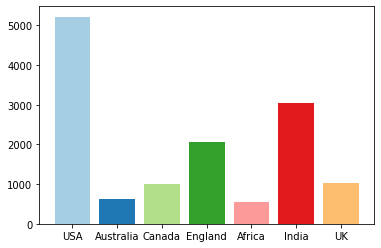

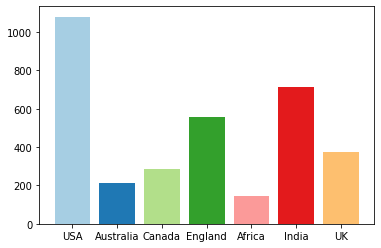

In [27]:
# Data volume per Country
values = []
for l in locations:
    values.append(locationSentiments[(locationSentiments['Location'].str.contains(l))].count()["Sentiment"])
plt.bar(locations, values, color=plt.cm.Paired(np.arange(len(locationSentiments))))
plt.show()

# Data volume per Country (only non-retweets)
values = []
for l in locations:
    values.append(nonRetweets[(nonRetweets['location'].str.contains(l))].count()["Sentiment"])
plt.bar(locations, values, color=plt.cm.Paired(np.arange(len(nonRetweets))))
plt.show()